In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from prince import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
# # Función para calcular la distancia Euclidiana a la media
# def distancia_euclidiana(x, media):
#     return np.sqrt((x - media) ** 2)
 
# # Función para calcular la distancia de Manhattan a la media
# def distancia_manhattan(x, media):
#     return np.abs(x - media)
 
# def distancia_a_mediana(x, mediana):
#     return abs(x - mediana)

In [3]:
df = pd.read_csv("base_distancia_limpia.csv")
df.set_index("Unnamed: 0", inplace=True,)
df

,mes,moneda,gestoria,concepto,nivel_1_cuenta,proveedor,vicepresidencia_direccion_cumpl,gasto_ejecutado,Distancia Euclidiana,Distancia Manhattan,Distancia a Mediana,Outlier_Distancia Euclidiana,Outlier_Distancia Manhattan,Outlier_Distancia a Mediana,reconfirma
Unnamed: 0,,,,,,,,,,,,,,,
0,1,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,82450463db14a390f55c2b6326b054e54bcf65aaab274a...,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,1.000580e+05,1.801251e+05,1.801251e+05,6.536500e+04,No Outlier,No Outlier,No Outlier,True
1,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,82450463db14a390f55c2b6326b054e54bcf65aaab274a...,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,4.339200e+04,2.367911e+05,2.367911e+05,8.699000e+03,No Outlier,No Outlier,No Outlier,True
2,2,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,82450463db14a390f55c2b6326b054e54bcf65aaab274a...,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,4.123200e+04,2.389511e+05,2.389511e+05,6.539000e+03,No Outlier,No Outlier,No Outlier,True
3,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,82450463db14a390f55c2b6326b054e54bcf65aaab274a...,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,2.169600e+04,2.584871e+05,2.584871e+05,1.299700e+04,No Outlier,No Outlier,No Outlier,True
4,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,82450463db14a390f55c2b6326b054e54bcf65aaab274a...,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,6.872000e+04,2.114631e+05,2.114631e+05,3.402700e+04,No Outlier,No Outlier,No Outlier,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571913,1,COP,Riesgo Operacional,f6c0405810e4a0ddcf7d0ecb8b6c339f61c97eb87e0c93...,Efectivo Y Canje,f2e146c521b7864e061157973783bc084cfe66e76da527...,b7ceae61c88412d8c51d88f500605d97bf170e74c72347...,3.970000e+06,2.256194e+08,2.256194e+08,5.450128e+08,No Outlier,No Outlier,No Outlier,True
571914,1,COP,Riesgo Operacional,f6c0405810e4a0ddcf7d0ecb8b6c339f61c97eb87e0c93...,Efectivo Y Canje,f2e146c521b7864e061157973783bc084cfe66e76da527...,b7ceae61c88412d8c51d88f500605d97bf170e74c72347...,-7.718080e+08,1.001397e+09,1.001397e+09,1.320791e+09,No Outlier,No Outlier,No Outlier,True
571915,1,COP,Riesgo Operacional,f6c0405810e4a0ddcf7d0ecb8b6c339f61c97eb87e0c93...,Efectivo Y Canje,f2e146c521b7864e061157973783bc084cfe66e76da527...,b7ceae61c88412d8c51d88f500605d97bf170e74c72347...,7.678380e+08,5.382486e+08,5.382486e+08,2.188551e+08,No Outlier,No Outlier,No Outlier,True


In [4]:
df["mes"] = df["mes"].astype(object)

In [5]:
df = df[["mes",
"moneda",
"gestoria",
"concepto",
"nivel_1_cuenta",
"gasto_ejecutado",
"vicepresidencia_direccion_cumpl",
]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566074 entries, 0 to 571917
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   mes                              566074 non-null  object 
 1   moneda                           566074 non-null  object 
 2   gestoria                         566071 non-null  object 
 3   concepto                         566074 non-null  object 
 4   nivel_1_cuenta                   566074 non-null  object 
 5   gasto_ejecutado                  566074 non-null  float64
 6   vicepresidencia_direccion_cumpl  566074 non-null  object 
dtypes: float64(1), object(6)
memory usage: 34.6+ MB


In [7]:
df_mca = df

In [8]:
# Seleccionar las columnas categóricas para el cálculo de MCA
df_mca = df[['mes', 'moneda','gestoria', 'concepto', 'nivel_1_cuenta', 'vicepresidencia_direccion_cumpl']]

# Calculo de MCA
mca = MCA(
    n_components=20,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df_mca)

# Resultados del MCA
mca_results = mca.transform(df_mca)
print(mca_results)

                  0         1         2         3         4         5   \
Unnamed: 0                                                               
0           0.427028  0.552448  0.870173 -0.085292  0.397564 -0.462718   
1           0.570641  0.557964  0.875877 -0.085187  0.396546 -0.503886   
2           0.451698  0.574541  0.897338 -0.085696  0.400359 -0.486285   
3           0.570641  0.557964  0.875877 -0.085187  0.396546 -0.503886   
4           0.570641  0.557964  0.875877 -0.085187  0.396546 -0.503886   
...              ...       ...       ...       ...       ...       ...   
571913      0.437751  0.628275  0.471915  0.249976 -1.349249  1.051345   
571914      0.437751  0.628275  0.471915  0.249976 -1.349249  1.051345   
571915      0.437751  0.628275  0.471915  0.249976 -1.349249  1.051345   
571916      0.437751  0.628275  0.471915  0.249976 -1.349249  1.051345   
571917      0.581364  0.633791  0.477619  0.250082 -1.350268  1.010176   

                  6         7        

In [9]:
df_mca['mes'].nunique() + df_mca['moneda'].nunique() + df_mca['gestoria'].nunique() + df_mca['concepto'].nunique() + df_mca['nivel_1_cuenta'].nunique() + df_mca['vicepresidencia_direccion_cumpl'].nunique() 

301

In [10]:
sum((mca.eigenvalues_))

10.139464124148093

In [11]:
len(mca.eigenvalues_)

20

In [12]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.674,1.37%,1.37%
1,0.659,1.34%,2.71%
2,0.614,1.25%,3.96%
3,0.588,1.19%,5.15%
4,0.569,1.16%,6.31%
5,0.547,1.11%,7.42%
6,0.519,1.05%,8.47%
7,0.503,1.02%,9.50%
8,0.496,1.01%,10.50%


In [13]:
mca.row_contributions_.head(20).style.format('{:.0%}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
1,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
2,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
3,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
5,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
7,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
8,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
9,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
10,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [14]:
mca.column_contributions_.head(20).style.format('{:.0%}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mes_1,1%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
mes_2,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
mes_3,1%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,1%
moneda_COP,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
moneda_EUR,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
moneda_GBP,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
moneda_USD,0%,0%,0%,0%,3%,1%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
gestoria_Abono por decisión comercial,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,1%,2%
gestoria_Activos Fijos,1%,2%,1%,0%,1%,1%,2%,0%,0%,0%,0%,0%,6%,0%,6%,0%,2%,0%,1%,1%
gestoria_Bonificaciones,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [15]:
# Transformar los datos
transformed_data = mca.transform(df_mca)

# Calcular la inercia explicada
eigenvalues = np.var(transformed_data, axis=0)
total_inertia = np.sum(eigenvalues)
explained_inertia = eigenvalues / total_inertia

# Crear un DataFrame para la inercia explicada
explained_df = pd.DataFrame({
    'Component': [i + 1 for i in range(len(explained_inertia))],
    'Explained Inertia': explained_inertia
})

# Crear el gráfico interactivo usando plotly
fig = px.line(explained_df, x='Component', y='Explained Inertia', markers=True, title='MCA Explained Inertia')
fig.update_layout(
    xaxis_title='Component',
    yaxis_title='Explained Inertia',
    template='plotly_white',
    hovermode='x'
)
fig.update_traces(marker=dict(size=8, color='red'), line=dict(color='blue', width=2))

# Mostrar el gráfico
fig.show()

In [16]:
mca = MCA(
    n_components= 8,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df_mca)

mca_results = mca.transform(df_mca)
print(mca_results)

                   0         1         2         3         4         5  \
Unnamed: 0                                                               
0          -0.327491  0.579956 -0.877179 -0.064030 -0.525080 -0.481335   
1          -0.464386  0.598880 -0.884832 -0.077657 -0.529604 -0.526053   
2          -0.345663  0.602510 -0.904339 -0.067365 -0.528944 -0.508089   
3          -0.464386  0.598880 -0.884832 -0.077657 -0.529604 -0.526053   
4          -0.464386  0.598880 -0.884832 -0.077657 -0.529604 -0.526053   
...              ...       ...       ...       ...       ...       ...   
571913     -0.339280  0.662710 -0.607663  0.285922  1.373704  0.198813   
571914     -0.339280  0.662710 -0.607663  0.285922  1.373704  0.198813   
571915     -0.339280  0.662710 -0.607663  0.285922  1.373704  0.198813   
571916     -0.339280  0.662710 -0.607663  0.285922  1.373704  0.198813   
571917     -0.476174  0.681633 -0.615316  0.272294  1.369180  0.154095   

                   6         7  
Unna

In [17]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.670,1.36%,1.36%
1,0.658,1.34%,2.70%
2,0.612,1.24%,3.94%
3,0.584,1.19%,5.13%
4,0.567,1.15%,6.28%
5,0.540,1.10%,7.38%
6,0.511,1.04%,8.42%
7,0.495,1.01%,9.42%


In [18]:
mca.row_contributions_.head(20).style.format('{:.0%}')

,0,1,2,3,4,5,6,7
0,0%,0%,0%,0%,0%,0%,0%,0%
1,0%,0%,0%,0%,0%,0%,0%,0%
2,0%,0%,0%,0%,0%,0%,0%,0%
3,0%,0%,0%,0%,0%,0%,0%,0%
4,0%,0%,0%,0%,0%,0%,0%,0%
5,0%,0%,0%,0%,0%,0%,0%,0%
7,0%,0%,0%,0%,0%,0%,0%,0%
8,0%,0%,0%,0%,0%,0%,0%,0%
9,0%,0%,0%,0%,0%,0%,0%,0%
10,0%,0%,0%,0%,0%,0%,0%,0%


In [19]:
mca.column_contributions_.head(20).style.format('{:.0%}')

,0,1,2,3,4,5,6,7
mes_1,0%,0%,0%,0%,0%,0%,0%,0%
mes_2,0%,0%,0%,0%,0%,0%,0%,0%
mes_3,1%,0%,0%,0%,0%,0%,0%,0%
moneda_COP,0%,0%,0%,0%,0%,0%,0%,0%
moneda_EUR,0%,0%,0%,0%,0%,0%,0%,0%
moneda_GBP,0%,0%,0%,0%,0%,0%,0%,0%
moneda_USD,0%,1%,0%,0%,3%,1%,2%,0%
gestoria_Abono por decisión comercial,0%,0%,0%,0%,0%,0%,0%,0%
gestoria_Activos Fijos,1%,3%,1%,0%,1%,1%,1%,2%
gestoria_Bonificaciones,0%,1%,0%,0%,0%,0%,0%,0%


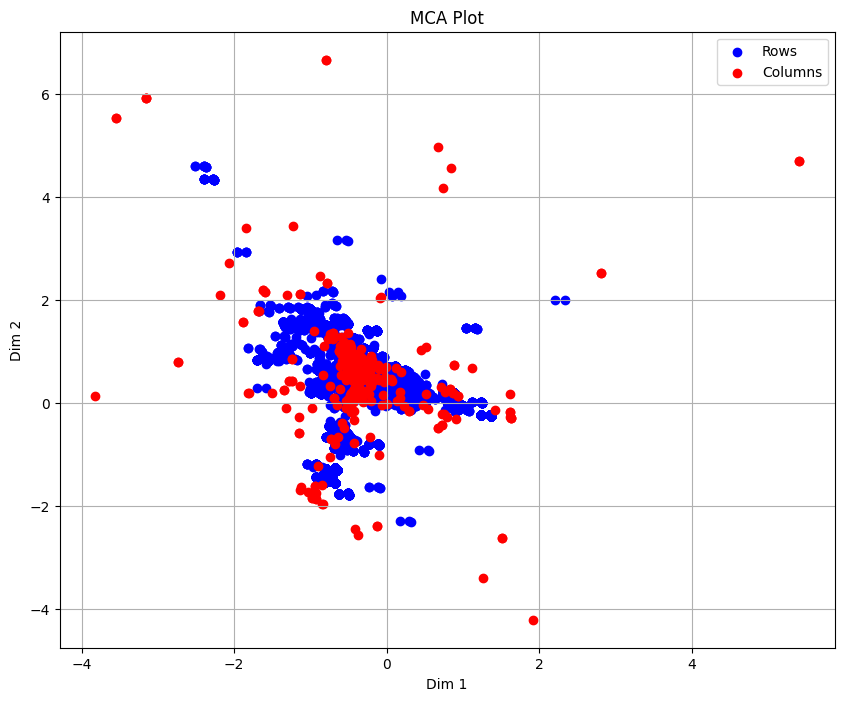

In [20]:
# Coordenadas de las filas
rows = mca.row_coordinates(df_mca)
# Coordenadas de las columnas
cols = mca.column_coordinates(df_mca)

plt.figure(figsize=(10, 8))

# Gráfica de las coordenadas de las filas
plt.scatter(rows[0], rows[1], label='Rows', color='blue')

# Gráfica de las coordenadas de las columnas
plt.scatter(cols[0], cols[1], label='Columns', color='red')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('MCA Plot')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
mca

MCA(n_components=8, n_iter=5, random_state=42)

In [22]:
DatosResumen = pd.DataFrame(mca_results)
start_number = 1
# Crear una lista con los nuevos nombres de las columnas
new_column_names = []
for i in range(len(DatosResumen.columns)):     
    new_column_names.append(f'PC{start_number + i}') 
DatosResumen.columns = new_column_names
DatosResumen['gasto_ejecutado'] = df['gasto_ejecutado']

In [23]:
DatosResumen

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,gasto_ejecutado
Unnamed: 0,,,,,,,,,
0,-0.327491,0.579956,-0.877179,-0.064030,-0.525080,-0.481335,0.250374,-1.155397,1.000580e+05
1,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,4.339200e+04
2,-0.345663,0.602510,-0.904339,-0.067365,-0.528944,-0.508089,0.297237,-1.194214,4.123200e+04
3,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,2.169600e+04
4,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,6.872000e+04
...,...,...,...,...,...,...,...,...,...
571913,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,3.970000e+06
571914,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,-7.718080e+08
571915,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,7.678380e+08


In [24]:
standard = StandardScaler()
 
# Aplicar el estandarizar a la columna 'gasto_ejecutado' y transformar los datos
DatosResumen['gasto_ejecutado_std'] = standard.fit_transform(DatosResumen[['gasto_ejecutado']])

In [25]:
DatosResumen

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,gasto_ejecutado,gasto_ejecutado_std
Unnamed: 0,,,,,,,,,,
0,-0.327491,0.579956,-0.877179,-0.064030,-0.525080,-0.481335,0.250374,-1.155397,1.000580e+05,-0.022098
1,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,4.339200e+04,-0.022657
2,-0.345663,0.602510,-0.904339,-0.067365,-0.528944,-0.508089,0.297237,-1.194214,4.123200e+04,-0.022678
3,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,2.169600e+04,-0.022871
4,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,6.872000e+04,-0.022407
...,...,...,...,...,...,...,...,...,...,...
571913,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,3.970000e+06,0.016033
571914,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,-7.718080e+08,-7.627843
571915,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,7.678380e+08,7.542557


In [26]:
DatosResumen['gasto_componente1']= DatosResumen['PC1'] + DatosResumen['gasto_ejecutado_std']
DatosResumen

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,gasto_ejecutado,gasto_ejecutado_std,gasto_componente1
Unnamed: 0,,,,,,,,,,,
0,-0.327491,0.579956,-0.877179,-0.064030,-0.525080,-0.481335,0.250374,-1.155397,1.000580e+05,-0.022098,-0.349590
1,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,4.339200e+04,-0.022657,-0.487042
2,-0.345663,0.602510,-0.904339,-0.067365,-0.528944,-0.508089,0.297237,-1.194214,4.123200e+04,-0.022678,-0.368341
3,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,2.169600e+04,-0.022871,-0.487256
4,-0.464386,0.598880,-0.884832,-0.077657,-0.529604,-0.526053,0.338086,-1.232301,6.872000e+04,-0.022407,-0.486793
...,...,...,...,...,...,...,...,...,...,...,...
571913,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,3.970000e+06,0.016033,-0.323247
571914,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,-7.718080e+08,-7.627843,-7.967123
571915,-0.339280,0.662710,-0.607663,0.285922,1.373704,0.198813,0.335146,-0.205765,7.678380e+08,7.542557,7.203277


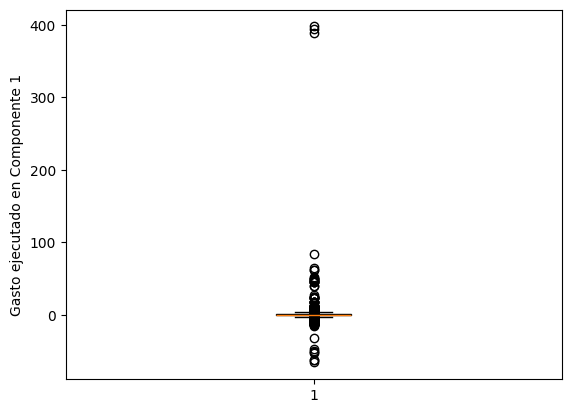

In [27]:
labels = ['Gasto ejecutado en Componente1']
colors = ['peachpuff']

fig, ax = plt.subplots()
ax.set_ylabel('Gasto ejecutado en Componente 1')

bplot = ax.boxplot(DatosResumen['gasto_componente1'],
                   patch_artist=True)  


plt.show()